In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
df = sns.load_dataset('diamonds')

In [24]:
# df의 행과 열 크기 확인
print(df.shape)
# df의 맨 앞 2개의 row만 확인 & ti의 맨 뒤 2개의 row만 확인
display(
    df.head(2),
    df.tail(2)
)

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


,carat,cut,color,clarity,depth,table,price,x,y,z
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [25]:
# df의 각 변수들의 non-null 데이터 개수와 type 파악하기 
display(
    df.isna().sum(),
    df.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

None

- **price:** 가격 (\$326 - \$18,823)
- **carat:** 무게 (0.2, 5.01)
- **cut:** 컷팅의 가치 (Fair, Good, Very Good, Premium, Ideal)
- **color:** 다이아몬드 색상(J(가장 나쁜)에서 D(가장 좋은)까지)
- **clarity:** 깨끗함 (I1 (가장 나쁜), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (가장 좋은))
- **x:** 길이 (0, 10.74mm)
- **y:** 너비 (0, 58.9mm)
- **z:** 깊이 (0, 31.8mm)
- **depth:** 깊이 비율 = z / mean(x, y)
- **table:** 가장 넓은 부분의 너비 대비 다이아몬드 꼭대기의 너비(43- 95)
- 참고) https://www2.stat.duke.edu/courses/Fall15/sta112.01/post/hw/HW1.html

In [26]:
# cut 변수의 unique한 값들 확인
print(df.cut.unique())

# color 변수의 unique한 값들 확인
print(df.color.unique())


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']


In [92]:
# cut 변수의 Ideal을 5, Preminum은 4, Very Good은 3, Good은 2, Fair은 1로 설정한 새로운 변수 cut_num을 df 데이터에 (열로)추가
cut_dict = {'Ideal' : 5, 'Premium': 4, 'Good':2, 'Very Good':3, 'Fair':1}
df["cut_num"] = df.cut.apply(lambda x: cut_dict[x])

# color 변수의 D를 7, E를 6, F를 5, G를 4, H를 3, I는 2, J는 1로 설정한 새로운 변수 color_num을 df 데이터에 (열로)추가
color_dict = {'D': 7, "E":6, "F":5, "G":4, "H":3, "I":2, "J":1}
df["color_num"] = df.color.apply(lambda x: color_dict[x])

# 두개의 변수가 제대로 추가됐는지 확인하기 위해 df의 앞의 5개행만 보기
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,cut_label,color_label
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,6,2,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,1,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,3,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,1,6


In [93]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.|
df["cut_label"]=le.fit_transform(df.cut)
df["color_label"]=le.fit_transform(df.color)

In [94]:
df[["cut", "cut_label"]].value_counts()

cut        cut_label
Ideal      2            21551
Premium    3            13791
Very Good  4            12082
Good       1             4906
Fair       0             1610
dtype: int64

In [95]:
df[["cut", "cut_num"]].value_counts()

cut        cut_num
Ideal      5          21551
Premium    4          13791
Very Good  3          12082
Good       2           4906
Fair       1           1610
dtype: int64

In [96]:
## carat, cut_num, color_num, x, y, z 데이터를 이용해서 price(가격)을 예측해볼거임
# df에서 carat, cut_num, color_num, x, y, z만 뽑은 데이터를 X로 설정, df에서 price만 뽑은 데이터를 y로 설정 
X = df[['carat', 'cut_num', 'color_num', 'x', 'y', 'z']]
y = df.price

In [97]:
# X와 y를 8:2의 비율로 train data / valid data로 나눠줌 (train_test_split 함수 이용. random_state는 42로 설정)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(43152, 6)
(43152,)
(10788, 6)
(10788,)


In [116]:
# x_train과 y_train을 이용하여 선형회귀모델 학습
learned_model = LinearRegression()
result = learned_model.fit(x_train, y_train)
result.score(x_train, y_train)

0.870554837581749

In [117]:
# 학습시킨 learned_model을 이용하여 x_test에 대한 y값 예측(y_pred)
y_pred = result.predict(x_test)

In [118]:
result.score(x_test, y_test)

0.8697872091659111

In [119]:
# 실제 y값인 y_test와 예측한 값인 y_pred를 이용하여 MSE 계산. sklearn에서 제공하는 metrics 이용
mse = mean_squared_error(y_test, y_pred)
print(mse)

2069969.4865597247


In [120]:
max(y_pred)

33028.86317984608

(-2000.0, 35000.0)

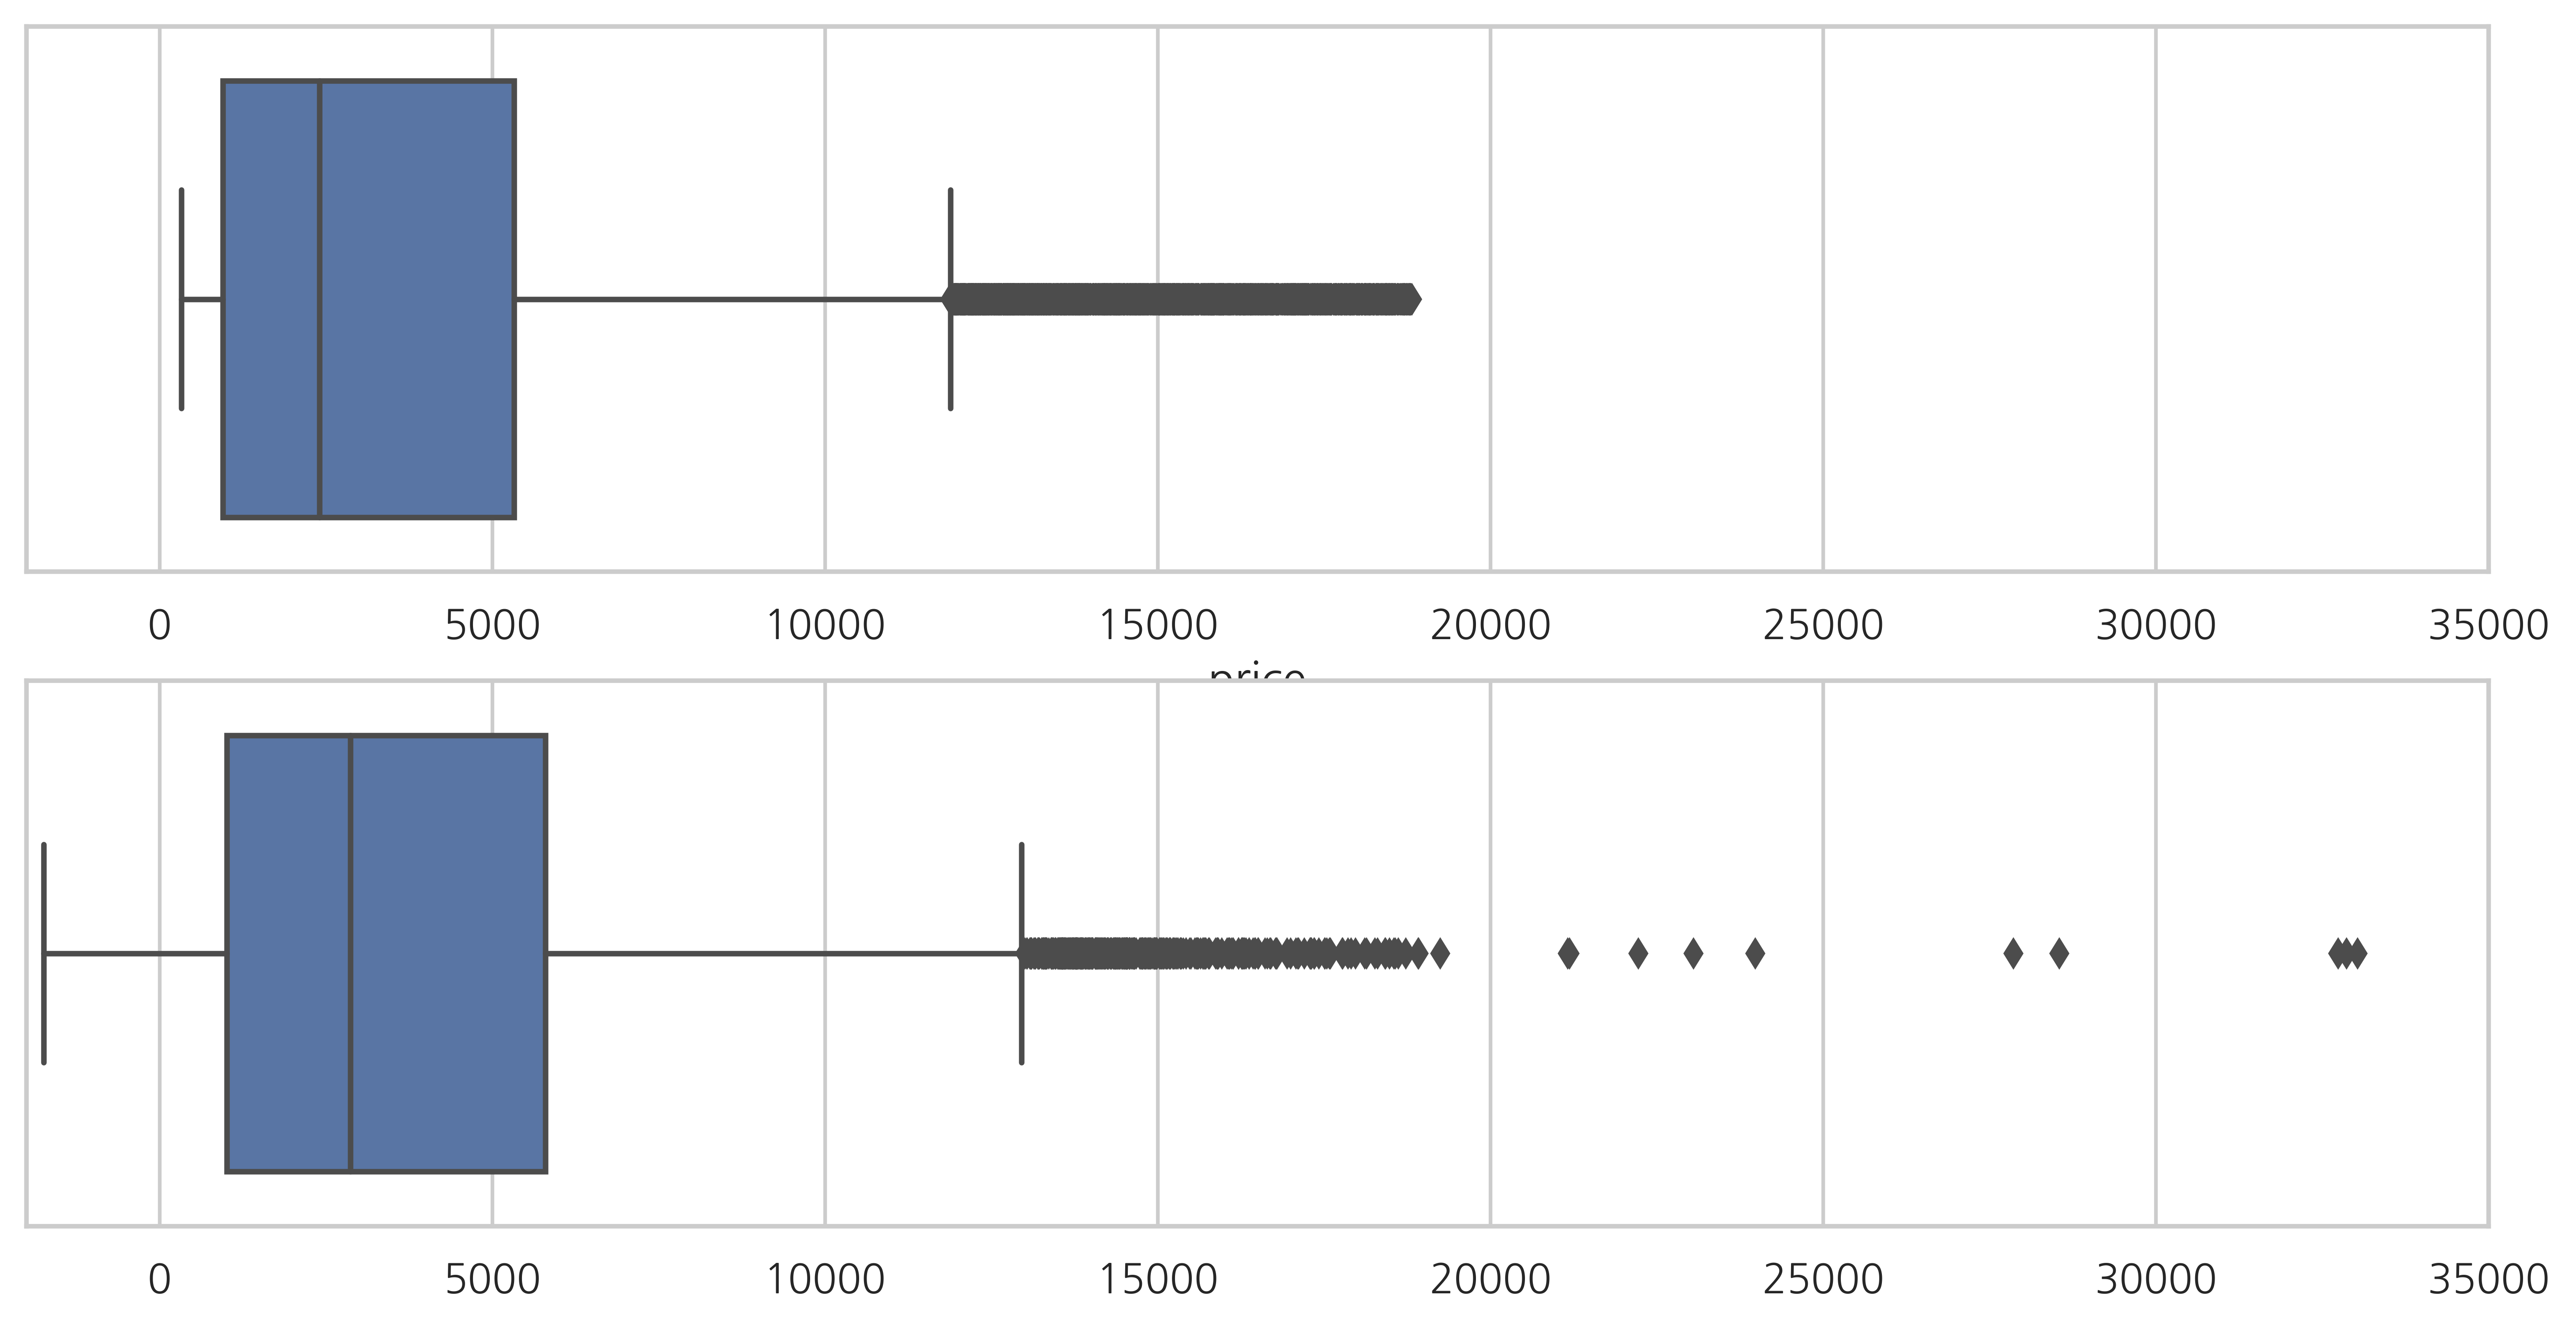

In [122]:
# y_pred를 print해서 대략 확인 후 df의 price를 boxplot으로 그려보기
plt.subplot(211)
sns.boxplot(df.price)
plt.xlim((-2000, 35000))
# y_pred를 boxplot으로 그려보기
plt.subplot(212)
sns.boxplot(y_pred)
plt.xlim((-2000, 35000))

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
# 모델 튜닝
forest = RandomForestRegressor()

In [110]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [111]:
y_pred = forest.predict(x_test)

In [112]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

1362731.9114049007


(-2000.0, 30000.0)

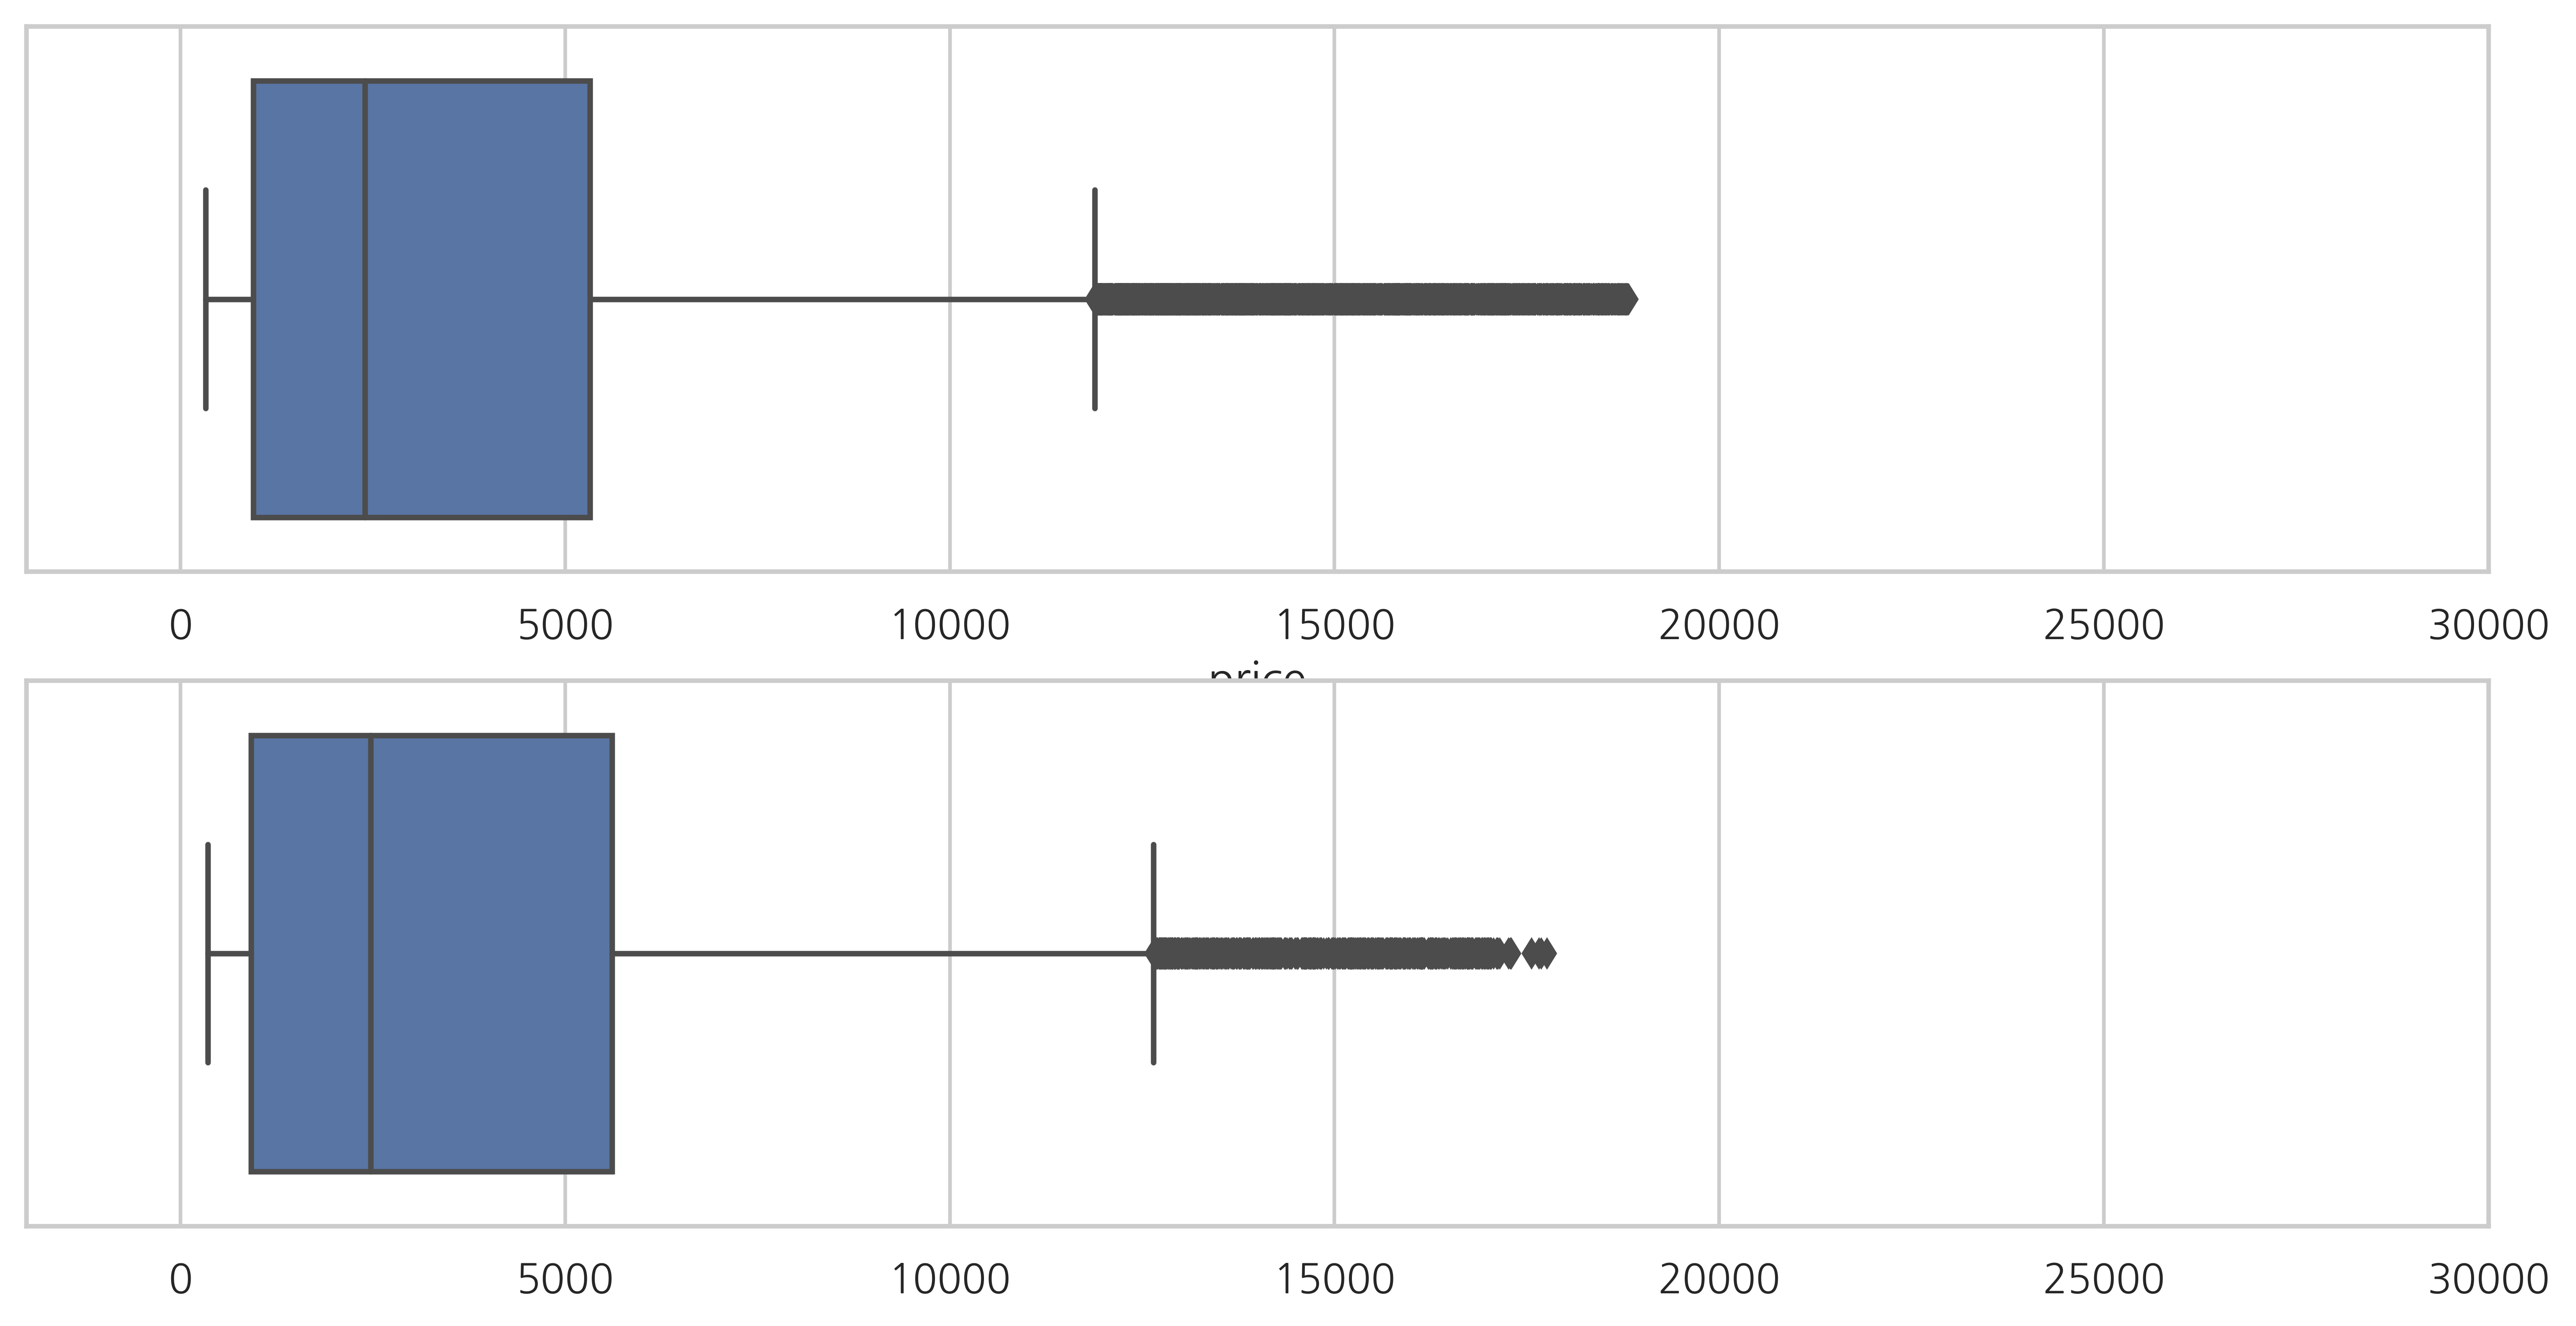

In [114]:
# y_pred를 print해서 대략 확인 후 df의 price를 boxplot으로 그려보기
plt.subplot(211)
sns.boxplot(df.price)
plt.xlim((-2000, 30000))
# y_pred를 boxplot으로 그려보기
plt.subplot(212)
sns.boxplot(y_pred)
plt.xlim((-2000, 30000))